<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/RCPSP_Cummulative_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ortools
from ortools.sat.python import cp_model # CP-SAT solver
import numpy as np
from random import randint
import random
from math import ceil
import pandas as pd
import matplotlib.pyplot as plt # Data visualization
from matplotlib.patches import Rectangle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.6/316.6 kB 12.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 5.28.1 which is incompatible.
google-ai-generativelanguage 0.6.6 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.2

In [ ]:
import pandas as pd

data = [
    [0, 0, 0, 0, 0, 18, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 24, 25, 26, 27, 28, 29, 30, 31],
    [10, 1, 0, 1, 1, 6, 23, 22, 19, 16, 15, 14],
    [5, 4, 1, 6, 0, 3, 17, 14, 8],
    [1, 6, 3, 2, 0, 3, 21, 15, 14],
    [3, 3, 0, 4, 2, 3, 18, 15, 14],
    [4, 0, 5, 2, 3, 3, 17, 15, 14],
    [1, 5, 4, 0, 2, 2, 19, 10],
    [2, 5, 5, 0, 4, 2, 20, 16],
    [2, 0, 4, 1, 7, 2, 18, 17],
    [4, 4, 0, 5, 6, 1, 16],
    [6, 2, 5, 0, 2, 1, 17],
    [4, 3, 5, 0, 2, 1, 15],
    [5, 0, 4, 4, 2, 1, 14],
    [6, 1, 3, 0, 2, 1, 32],
    [7, 3, 3, 0, 2, 1, 32],
    [10, 4, 7, 0, 3, 1, 32],
    [1, 0, 4, 1, 2, 1, 32],
    [1, 4, 0, 5, 6, 1, 32],
    [8, 4, 4, 10, 0, 1, 32],
    [8, 9, 0, 4, 4, 1, 32],
    [1, 0, 5, 4, 7, 1, 32],
    [6, 5, 4, 3, 0, 1, 32],
    [9, 0, 5, 5, 4, 1, 32],
    [9, 2, 4, 0, 3, 1, 32],
    [10, 0, 1, 4, 8, 1, 32],
    [5, 4, 0, 4, 7, 1, 32],
    [5, 2, 0, 3, 3, 1, 32],
    [8, 5, 0, 9, 4, 1, 32],
    [7, 6, 0, 4, 5, 1, 32],
    [7, 4, 0, 3, 5, 1, 32],
    [9, 6, 4, 0, 8, 1, 32],
    [0, 0, 0, 0, 0, 0]
]


cleaned = []
for i in range(len(data)):
  a = [data[i][0], data[i][1:5],data[i][6:] ]
  print(i,a)
  cleaned.append(a)


df = pd.DataFrame(cleaned, columns=['duration','load', 'suc'])
df

0 [0, [0, 0, 0, 0], [2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 24, 25, 26, 27, 28, 29, 30, 31]]
1 [10, [1, 0, 1, 1], [23, 22, 19, 16, 15, 14]]
2 [5, [4, 1, 6, 0], [17, 14, 8]]
3 [1, [6, 3, 2, 0], [21, 15, 14]]
4 [3, [3, 0, 4, 2], [18, 15, 14]]
5 [4, [0, 5, 2, 3], [17, 15, 14]]
6 [1, [5, 4, 0, 2], [19, 10]]
7 [2, [5, 5, 0, 4], [20, 16]]
8 [2, [0, 4, 1, 7], [18, 17]]
9 [4, [4, 0, 5, 6], [16]]
10 [6, [2, 5, 0, 2], [17]]
11 [4, [3, 5, 0, 2], [15]]
12 [5, [0, 4, 4, 2], [14]]
13 [6, [1, 3, 0, 2], [32]]
14 [7, [3, 3, 0, 2], [32]]
15 [10, [4, 7, 0, 3], [32]]
16 [1, [0, 4, 1, 2], [32]]
17 [1, [4, 0, 5, 6], [32]]
18 [8, [4, 4, 10, 0], [32]]
19 [8, [9, 0, 4, 4], [32]]
20 [1, [0, 5, 4, 7], [32]]
21 [6, [5, 4, 3, 0], [32]]
22 [9, [0, 5, 5, 4], [32]]
23 [9, [2, 4, 0, 3], [32]]
24 [10, [0, 1, 4, 8], [32]]
25 [5, [4, 0, 4, 7], [32]]
26 [5, [2, 0, 3, 3], [32]]
27 [8, [5, 0, 9, 4], [32]]
28 [7, [6, 0, 4, 5], [32]]
29 [7, [4, 0, 3, 5], [32]]
30 [9, [6, 4, 0, 8], [32]]
31 [0, [0, 0, 0, 0], []]


,duration,load,suc
0,0,"[0, 0, 0, 0]","[2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 24, 25, 26, ..."
1,10,"[1, 0, 1, 1]","[23, 22, 19, 16, 15, 14]"
2,5,"[4, 1, 6, 0]","[17, 14, 8]"
3,1,"[6, 3, 2, 0]","[21, 15, 14]"
4,3,"[3, 0, 4, 2]","[18, 15, 14]"
5,4,"[0, 5, 2, 3]","[17, 15, 14]"
6,1,"[5, 4, 0, 2]","[19, 10]"
7,2,"[5, 5, 0, 4]","[20, 16]"
8,2,"[0, 4, 1, 7]","[18, 17]"
9,4,"[4, 0, 5, 6]",[16]


In [ ]:
KOLORS = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
            "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
            "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
            "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5",
            "#8c6d31", "#9c9ede", "#637939", "#e7cb94", "#b5cf6b",
            "#cedb9c", "#c7c7c7", "#bd9e39", "#e7969c", "#7b4173"]

FEASIBLE
NumConflicts: 0
NumBranches: 0
WallTime: 202.39771601400003


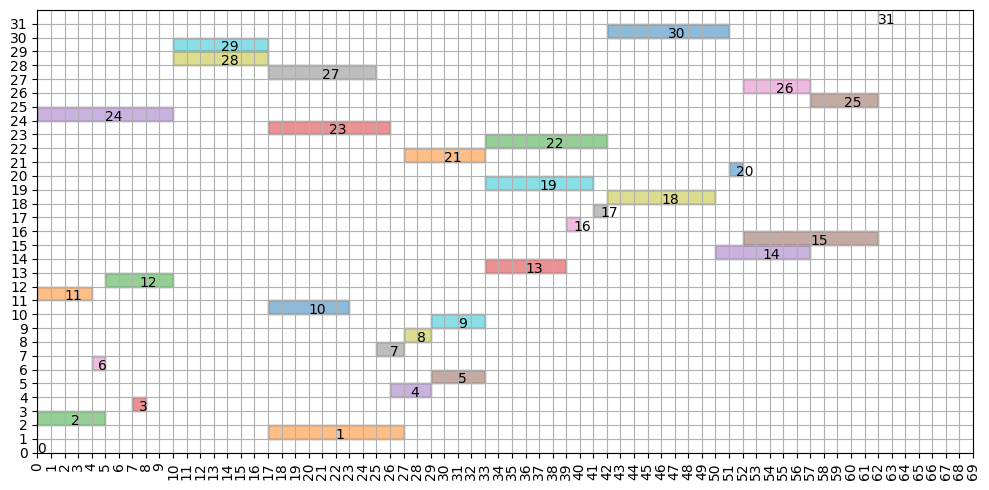

In [ ]:

from __future__ import print_function
from ortools.sat.python import cp_model as cp
import math, sys
# from cp_sat_utils import my_cumulative


def main():

  model = cp.CpModel()

  #
  # data
  #
  n = 4
  N = len(df)
  tasks = range(N)
  duration = [d for d in df['duration']]
  demand ={}
  machines = range(n)

  for m in machines:
    demand[m] = [df.loc[task,'load'][m] for task in tasks]
  upper_limit = 70

  #
  # declare variables
  #
  start_times = [
      model.NewIntVar(0, upper_limit-duration[i], "start_times[%i]" % i) for i in tasks
  ]
  #end_times = [
  #    model.NewIntVar(0, upper_limit * 2, "end_times[%i]" % i) for i in tasks
  #]
  end_time = model.NewIntVar(0, upper_limit, "end_time")

  #intervals = [model.NewIntervalVar(start_times[i],duration[i],start_times[i]+ duration[i],f"interval[{i}]")  for i in tasks]
  intervals = [model.NewFixedSizeIntervalVar(start_times[i],duration[i],f"interval[{i}]")  for i in tasks]


  # number of needed resources, to be minimized

  #
  # constraints
  #
  #model.AddMaxEquality(end_time,end_times)
  for machine in machines:
    model.AddCumulative(intervals, demand[machine], 10)

  for task in tasks:
    model.Add(start_times[task]+duration[task]<= end_time)
    for k in df.loc[task,'suc']:
      model.Add(start_times[task]+duration[task]<=start_times[k-1] )



  #
  # Some extra constraints to play with
  #

  # all tasks must end within an hour

  # All tasks should start at time 0
  # for i in range(n):
  #    model.Add(start_times[i] == 0)

  # limitation of the number of people
  # model.Add(num_resources <= 3)

  #
  # objective
  #
  model.Minimize(end_time)
  #model.Minimize(end_time)

  #
  # solution and search
  #
  solver = cp.CpSolver()
  solver.parameters.num_workers = 16

  status = solver.Solve(model)
  #
  # result
  #
  if status == cp.OPTIMAL:
    print("OPTIMAL")
    print("num_resources:", solver.Value(end_time))
    #print("start_times  :", [solver.Value(start_times[i]) for i in range(n)])
    #print("duration     :", [duration[i] for i in range(n)])
    #print("end_times    :", [solver.Value(end_times[i]) for i in range(n)])
    #print("end_time     :", solver.Value(end_time))
  elif status == cp.INFEASIBLE:
    print("INFEASIBLE")
  elif status == cp.FEASIBLE:
    print("FEASIBLE")
  elif status == cp.UNKNOWN:
    print("UNKNOWN")

  # print("num_solutions:", num_solutions)
  print("NumConflicts:", solver.NumConflicts())
  print("NumBranches:", solver.NumBranches())
  print("WallTime:", solver.WallTime())

  plt.figure(figsize=(10,5))
  for task in tasks:
    st,fn = solver.value(start_times[task]), solver.value(start_times[task]) + duration[task]
    plt.gca().add_patch(Rectangle((st,task), duration[task],1,linewidth=1,edgecolor='k',facecolor=KOLORS[task%10], alpha =0.5))
    plt.text(0.5*(st+fn), task, s= str(task))

  plt.xlim(0,solver.value(end_time)+2)
  plt.ylim(0,32)
  plt.yticks(tasks)
  plt.xticks(range(70), rotation =90)

  plt.grid()
  plt.tight_layout()


if __name__ == "__main__":
  main()